In [19]:
#data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

raw_wine_data = "wine_raw_data.csv"
raw_wine_data_df = pd.read_csv(raw_wine_data)
#gathered only columns needed
reduced_wine_df = raw_wine_data_df.loc[:, ["title", "points", "price", "country", "province", "region_1", "variety", "winery", "description"]]
reduced_wine_df.head()



,title,points,price,country,province,region_1,variety,winery,description
0,Nicosia 2013 Vulkà Bianco (Etna),87,NaN,Italy,Sicily & Sardinia,Etna,White Blend,Nicosia,"Aromas include tropical fruit, broom, brimston..."
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),87,15.0,Portugal,Douro,NaN,Portuguese Red,Quinta dos Avidagos,"This is ripe and fruity, a wine that is smooth..."
2,Rainstorm 2013 Pinot Gris (Willamette Valley),87,14.0,US,Oregon,Willamette Valley,Pinot Gris,Rainstorm,"Tart and snappy, the flavors of lime flesh and..."
3,St. Julian 2013 Reserve Late Harvest Riesling ...,87,13.0,US,Michigan,Lake Michigan Shore,Riesling,St. Julian,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,87,65.0,US,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks,"Much like the regular bottling from 2012, this..."


In [2]:
# data frames for our specific data
pinot_noir = reduced_wine_df.loc[reduced_wine_df["variety"] == "Pinot Noir"]
chardonnay = reduced_wine_df.loc[reduced_wine_df["variety"] == "Chardonnay"]
cabernet = reduced_wine_df.loc[reduced_wine_df["variety"] == "Cabernet Sauvignon"]
red_blend = reduced_wine_df.loc[reduced_wine_df["variety"] == "Red Blend"]

# removed NaN from whole dataframe
df_dropna = reduced_wine_df.dropna()

#count variety dataframe
countv = df_dropna['variety'].value_counts()
countv

countvc_df = pd.DataFrame(countv)
countvc_df = countvc_df.reset_index()
top10variety = countvc_df.loc[0:9,:]
top10variety #top 10 variety 

,index,variety
0,Pinot Noir,11693
1,Chardonnay,10070
2,Cabernet Sauvignon,8284
3,Red Blend,7537
4,Bordeaux-style Red Blend,5123
5,Syrah,3617
6,Sauvignon Blanc,3177
7,Rosé,2839
8,Zinfandel,2707
9,Merlot,2630


In [3]:
varietygroupby = df_dropna.groupby('variety')
priceaverage = varietygroupby['price'].mean()
pointsaverage = varietygroupby['points'].mean()

varietypricepoints_df = pd.DataFrame({'price average': priceaverage, 'points average': pointsaverage})
varietypricepoints_df = varietypricepoints_df.reset_index('variety')
varietypricepoints_df.head()

,variety,price average,points average
0,Abouriou,35.000000,87.666667
1,Aglianico,38.887755,89.397959
2,Airen,9.000000,81.666667
3,Albana,22.833333,89.277778
4,Albanello,20.000000,86.000000


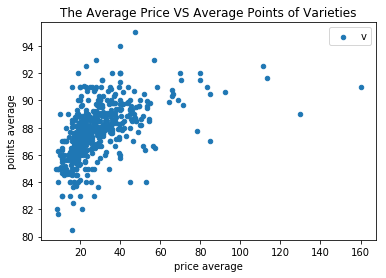

In [17]:
#hideme
#scatterplot with all the variety for price vs points
varietypricepoints_df.plot(kind='scatter', x='price average', y='points average')
plt.title("The Average Price VS Average Points of Varieties")
plt.legend('varieties')
plt.savefig("pricevspoints.pdf")

<Figure size 432x288 with 0 Axes>

In [5]:
countrygroupby = df_dropna.groupby('country')
priceaverage = countrygroupby['price'].mean()
pointsaverage = countrygroupby['points'].mean()

countrypricepoints_df = pd.DataFrame({'price average': priceaverage, 'points average': pointsaverage})
countrypricepoints_df = countrypricepoints_df.reset_index('country')
countrypricepoints_df

,country,price average,points average
0,Argentina,24.576289,86.721307
1,Australia,35.446771,88.597731
2,Canada,35.712598,89.377953
3,France,41.217133,88.740174
4,Italy,39.687193,88.617917
5,Spain,28.214471,87.288652
6,US,36.649466,88.576506


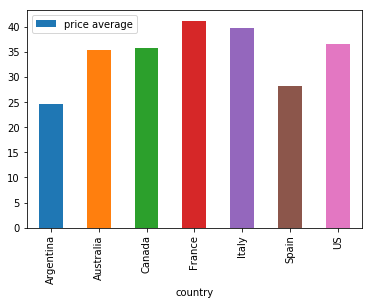

In [6]:
countrypricepoints_df.plot(kind='bar', x='country', y='price average')

In [7]:
# ttest
p1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Pinot Noir"]["points"]
ch1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Chardonnay"]["points"]
ca1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Cabernet Sauvignon"]["points"]
red1 = reduced_wine_df.loc[reduced_wine_df["variety"] == "Red Blend"]["points"]
stats.f_oneway(p1, ch1, ca1, red1)

F_onewayResult(statistic=312.67809989095554, pvalue=7.251864807709925e-201)

In [8]:
provincegroupby = df_dropna.groupby('province')
provincegroupby.head()

,title,points,price,country,province,region_1,variety,winery,description
2,Rainstorm 2013 Pinot Gris (Willamette Valley),87,14.0,US,Oregon,Willamette Valley,Pinot Gris,Rainstorm,"Tart and snappy, the flavors of lime flesh and..."
3,St. Julian 2013 Reserve Late Harvest Riesling ...,87,13.0,US,Michigan,Lake Michigan Shore,Riesling,St. Julian,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,87,65.0,US,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks,"Much like the regular bottling from 2012, this..."
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,87,15.0,Spain,Northern Spain,Navarra,Tempranillo-Merlot,Tandem,Blackberry and raspberry aromas show a typical...
6,Terre di Giurfo 2013 Belsito Frappato (Vittoria),87,16.0,Italy,Sicily & Sardinia,Vittoria,Frappato,Terre di Giurfo,"Here's a bright, informal red that opens with ..."
7,Trimbach 2012 Gewurztraminer (Alsace),87,24.0,France,Alsace,Alsace,Gewürztraminer,Trimbach,This dry and restrained wine offers spice in p...
9,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,87,27.0,France,Alsace,Alsace,Pinot Gris,Jean-Baptiste Adam,This has great depth of flavor with its fresh ...
10,Kirkland Signature 2011 Mountain Cuvée Caberne...,87,19.0,US,California,Napa Valley,Cabernet Sauvignon,Kirkland Signature,"Soft, supple plum envelopes an oaky structure ..."
11,Leon Beyer 2012 Gewurztraminer (Alsace),87,30.0,France,Alsace,Alsace,Gewürztraminer,Leon Beyer,"This is a dry wine, very spicy, with a tight, ..."
12,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,87,34.0,US,California,Alexander Valley,Cabernet Sauvignon,Louis M. Martini,"Slightly reduced, this wine offers a chalky, t..."


In [9]:
#reduced_wine_df.boxplot("points", by="variety", figsize=(20, 10))
